<a href="https://colab.research.google.com/github/tylerscott3/CS290/blob/main/NaiveBayesClassifierProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
student_performance = fetch_ucirepo(id=320)

# data (as pandas dataframes)
X = student_performance.data.features
y = student_performance.data.targets

# metadata
print(student_performance.metadata)

# variable information
print(student_performance.variables)


{'uci_id': 320, 'name': 'Student Performance', 'repository_url': 'https://archive.ics.uci.edu/dataset/320/student+performance', 'data_url': 'https://archive.ics.uci.edu/static/public/320/data.csv', 'abstract': 'Predict student performance in secondary education (high school). ', 'area': 'Social Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 649, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': ['Sex', 'Age', 'Other', 'Education Level', 'Occupation'], 'target_col': ['G1', 'G2', 'G3'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5TG7T', 'creators': ['Paulo Cortez'], 'intro_paper': {'ID': 360, 'type': 'NATIVE', 'title': 'Using data mining to predict secondary school student performance', 'authors': 'P. Cortez, A. M. G. Silva', 'venue': 'Proceedings of 5th Annual Future Business Technolo

In [6]:
df = pd.concat([X,y], axis=1)

In [7]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [9]:
df = df.drop(['G1', 'G2'], axis=1)

In [10]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,13


In [14]:
priors = df['G3'].value_counts(normalize=True)

In [15]:
priors

,proportion
G3,
11,0.160247
10,0.149461
13,0.126348
12,0.110940
14,0.097072
15,0.075501
16,0.055470
9,0.053929
8,0.053929


In [46]:
df["Dalc"].mean()

1.50231124807396

In [47]:
df["Dalc_cat"] = (df["Dalc"] > 1.5)*1

In [48]:
df["Dalc_cat"].value_counts(normalize=True)

,proportion
Dalc_cat,
0,0.694915
1,0.305085


In [49]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G3,freetime_cat,Walc_cat,Dalc_cat
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,11,0,0,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,11,0,0,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,0,1,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,0,0,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,13,0,0,0


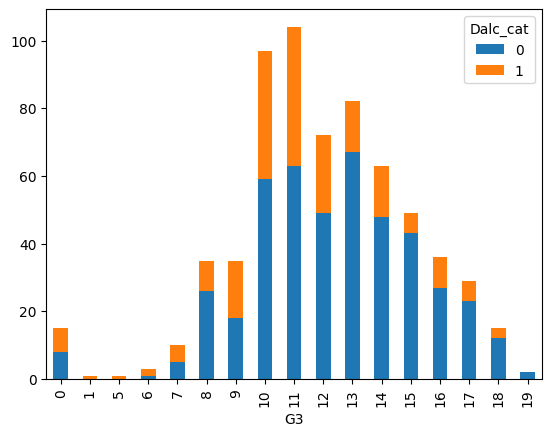

In [50]:
df.groupby(["G3","Dalc_cat"]).size().unstack().plot(kind='bar',stacked=True);

In [51]:
df.groupby(["G3","Dalc_cat"]).size().unstack()

Dalc_cat,0,1
G3,,
0,8.0,7.0
1,NaN,1.0
5,NaN,1.0
6,1.0,2.0
7,5.0,5.0
8,26.0,9.0
9,18.0,17.0
10,59.0,38.0
11,63.0,41.0


In [53]:
df.groupby(["G3","Dalc_cat"]).size().unstack().sum()

,0
Dalc_cat,
0,451.0
1,198.0


In [54]:
198/(198+451)

0.3050847457627119

In [55]:
df.groupby(["G3","Dalc_cat"]).size().unstack() / df.groupby(["G3","Dalc_cat"]).size().unstack().sum()

Dalc_cat,0,1
G3,,
0,0.017738,0.035354
1,NaN,0.005051
5,NaN,0.005051
6,0.002217,0.010101
7,0.011086,0.025253
8,0.057650,0.045455
9,0.039911,0.085859
10,0.130820,0.191919
11,0.139690,0.207071


In [56]:
df["G3"].mean()

11.906009244992296

In [57]:
df["G3_sections"] = (df["G3"] > 11.91)*1

In [58]:
df.groupby(["Dalc_cat","G3_sections"]).size().unstack() / df.groupby(["Dalc_cat","G3_sections"]).size().unstack().sum()

G3_sections,0,1
Dalc_cat,,
0,0.598007,0.778736
1,0.401993,0.221264
